In [21]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import nbformat

pd.options.display.float_format = '{:,.2f}'.format

In [22]:
df = pd.read_excel("Bank loan portfolio.xlsx", sheet_name='Sheet1')  

df

,Position Id,Counterparty Id,Customer Name,Rating Class,Stage,Currency,Days Past Due,PD Segment,One Year PD,Lifetime PD,Initial LGD,Accrued Interest,Current Exposure,Suspended interest,Overlay,ECL final after all edit,ECL Coverage Ratio
0,2102028735262023,102028735,شركه نويبا شارم للمشروعات السياحيه,ORR 6,STAGE_2,EGP,0,SME,0.08,0.54,0.00,0.00,"161,020,318.01",NaN,"23,185,978.37","40,411,238.55",0.25
1,2102041322202023,102041322,الهيئه المصريه العامه للبترول ق مشترك,ORR 1,STAGE_1,USD,29,Corporate,0.00,0.00,0.00,0.00,"52,672,242,439.92",NaN,0.00,0.00,0.00
2,2102041322182023,102041322,الهيئه المصريه العامه للبترول ق مشترك,ORR 1,STAGE_1,USD,29,Corporate,0.00,0.00,0.00,0.00,"52,672,242,439.41",NaN,0.00,0.00,0.00
3,2102041322192023,102041322,الهيئه المصريه العامه للبترول ق مشترك,ORR 1,STAGE_1,USD,29,Corporate,0.00,0.00,0.00,0.00,"52,672,242,439.41",NaN,0.00,0.00,0.00
4,910900480012024,109004800,هيئه قناه السويس,ORR 1,STAGE_1,EGP,0,Corporate,0.00,0.00,0.00,0.00,"40,000,000,000.00",NaN,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5282,112401832024,111003298,يونيون فورليزر,ORR 5,STAGE_1,EUR,0,Corporate,0.03,0.00,0.00,0.00,0.00,NaN,0.00,0.00,NaN
5283,112402332024,111003298,يونيون فورليزر,ORR 5,STAGE_1,EUR,0,Corporate,0.03,0.00,0.00,0.00,0.00,NaN,0.00,0.00,NaN
5284,112401932024,111003298,يونيون فورليزر,ORR 5,STAGE_1,EUR,0,Corporate,0.03,0.00,0.00,0.00,0.00,NaN,0.00,0.00,NaN
5285,112402532024,111003298,يونيون فورليزر,ORR 5,STAGE_1,EUR,0,Corporate,0.03,0.00,0.00,0.00,0.00,NaN,0.00,0.00,NaN


In [23]:
df.dtypes

Position Id                  object
Counterparty Id               int64
Customer Name                object
Rating Class                 object
Stage                        object
Currency                     object
Days Past Due                 int64
PD Segment                   object
One Year PD                 float64
Lifetime PD                 float64
Initial LGD                 float64
Accrued Interest            float64
Current Exposure            float64
Suspended interest          float64
Overlay                     float64
ECL final after all edit    float64
ECL Coverage Ratio          float64
dtype: object

In [24]:
df.describe()

,Counterparty Id,Days Past Due,One Year PD,Lifetime PD,Initial LGD,Accrued Interest,Current Exposure,Suspended interest,Overlay,ECL final after all edit,ECL Coverage Ratio
count,"5,287.00","5,287.00","5,287.00","5,287.00","5,287.00","5,287.00","5,287.00",5.00,"5,287.00","5,287.00","5,194.00"
mean,"107,625,002.76",60.04,0.11,0.13,0.60,0.00,"44,519,506.28","85,618,591.28","72,268.50","682,215.04",0.11
std,"9,431,454.04",238.04,0.26,0.26,0.24,0.30,"1,373,937,386.33","55,723,241.77","531,637.70","13,522,508.11",0.26
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"12,706,815.88",0.00,0.00,0.00
25%,"102,006,696.00",0.00,0.03,0.01,0.65,0.00,"69,246.12","57,462,795.01",0.00,928.11,0.01
50%,"104,002,279.00",0.00,0.03,0.03,0.65,0.00,"426,038.19","79,302,991.72","1,422.42","6,445.32",0.03
75%,"111,002,921.00",0.00,0.05,0.08,0.65,0.00,"2,150,000.00","123,404,465.51","15,867.65","56,631.33",0.05
max,"133,000,095.00","3,136.00",1.00,1.00,1.00,21.70,"52,672,242,439.92","155,215,888.28","23,185,978.37","907,586,864.62",1.00


In [25]:
# Check for missing values

df.isnull().sum()  # This code will output the number of missing values in each column.

Position Id                    0
Counterparty Id                0
Customer Name                  0
Rating Class                   0
Stage                          0
Currency                       0
Days Past Due                  0
PD Segment                     0
One Year PD                    0
Lifetime PD                    0
Initial LGD                    0
Accrued Interest               0
Current Exposure               0
Suspended interest          5282
Overlay                        0
ECL final after all edit       0
ECL Coverage Ratio            93
dtype: int64

In [26]:
# Check for duplicate rows
df.duplicated().sum()

np.int64(0)

# Loop through each column with missing values

In [27]:
'''
# Create a new Excel writer
with pd.ExcelWriter('missing_values.xlsx') as writer:
    # Loop through each column with missing values
    for col in df.columns[df.isnull().any()]:
        # Clean the column name by replacing invalid characters
        cleaned_col = col.replace("/", "_").replace("\\", "_").replace("?", "_").replace("*", "_").replace("[", "_").replace("]", "_") 

        # Filter the DataFrame to get rows with missing values in the current column
        missing_rows = df[df[col].isnull()]

        # Write the filtered DataFrame to a new sheet in the Excel file
        missing_rows.to_excel(writer, sheet_name=f"Missing_{cleaned_col}", index=False)
'''

'\n# Create a new Excel writer\nwith pd.ExcelWriter(\'missing_values.xlsx\') as writer:\n    # Loop through each column with missing values\n    for col in df.columns[df.isnull().any()]:\n        # Clean the column name by replacing invalid characters\n        cleaned_col = col.replace("/", "_").replace("\\", "_").replace("?", "_").replace("*", "_").replace("[", "_").replace("]", "_") \n\n        # Filter the DataFrame to get rows with missing values in the current column\n        missing_rows = df[df[col].isnull()]\n\n        # Write the filtered DataFrame to a new sheet in the Excel file\n        missing_rows.to_excel(writer, sheet_name=f"Missing_{cleaned_col}", index=False)\n'

In [28]:
#df['ECL_Coverage'] = df["Final Impairment"] / df["EAD Amount"]
df

,Position Id,Counterparty Id,Customer Name,Rating Class,Stage,Currency,Days Past Due,PD Segment,One Year PD,Lifetime PD,Initial LGD,Accrued Interest,Current Exposure,Suspended interest,Overlay,ECL final after all edit,ECL Coverage Ratio
0,2102028735262023,102028735,شركه نويبا شارم للمشروعات السياحيه,ORR 6,STAGE_2,EGP,0,SME,0.08,0.54,0.00,0.00,"161,020,318.01",NaN,"23,185,978.37","40,411,238.55",0.25
1,2102041322202023,102041322,الهيئه المصريه العامه للبترول ق مشترك,ORR 1,STAGE_1,USD,29,Corporate,0.00,0.00,0.00,0.00,"52,672,242,439.92",NaN,0.00,0.00,0.00
2,2102041322182023,102041322,الهيئه المصريه العامه للبترول ق مشترك,ORR 1,STAGE_1,USD,29,Corporate,0.00,0.00,0.00,0.00,"52,672,242,439.41",NaN,0.00,0.00,0.00
3,2102041322192023,102041322,الهيئه المصريه العامه للبترول ق مشترك,ORR 1,STAGE_1,USD,29,Corporate,0.00,0.00,0.00,0.00,"52,672,242,439.41",NaN,0.00,0.00,0.00
4,910900480012024,109004800,هيئه قناه السويس,ORR 1,STAGE_1,EGP,0,Corporate,0.00,0.00,0.00,0.00,"40,000,000,000.00",NaN,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5282,112401832024,111003298,يونيون فورليزر,ORR 5,STAGE_1,EUR,0,Corporate,0.03,0.00,0.00,0.00,0.00,NaN,0.00,0.00,NaN
5283,112402332024,111003298,يونيون فورليزر,ORR 5,STAGE_1,EUR,0,Corporate,0.03,0.00,0.00,0.00,0.00,NaN,0.00,0.00,NaN
5284,112401932024,111003298,يونيون فورليزر,ORR 5,STAGE_1,EUR,0,Corporate,0.03,0.00,0.00,0.00,0.00,NaN,0.00,0.00,NaN
5285,112402532024,111003298,يونيون فورليزر,ORR 5,STAGE_1,EUR,0,Corporate,0.03,0.00,0.00,0.00,0.00,NaN,0.00,0.00,NaN


# Plot Charter

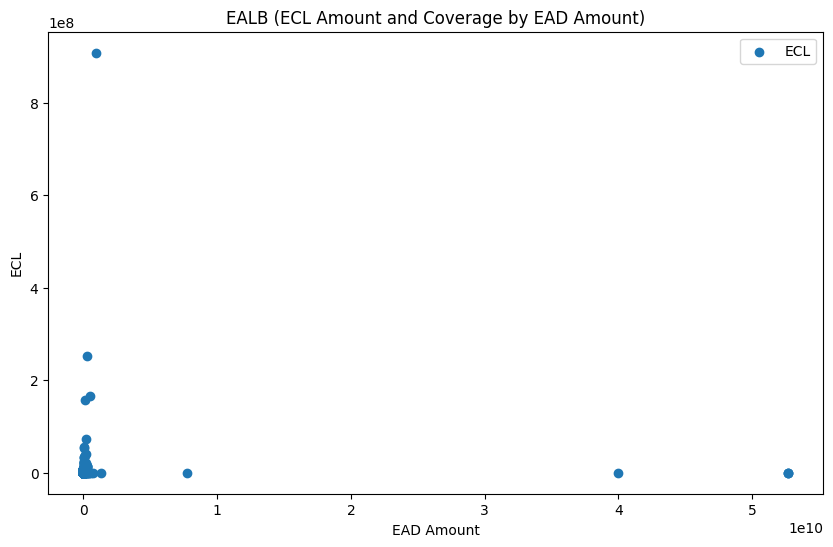

In [29]:
plt.figure(figsize=(10,6))
plt.scatter(df["Current Exposure"], df["ECL final after all edit"], label="ECL")
#plt.scatter(df["EAD Amount"], df['ECL_Coverage'], label='ECL Coverage')
plt.xlabel('EAD Amount')
plt.ylabel('ECL')
plt.title('EALB (ECL Amount and Coverage by EAD Amount)')
plt.legend()
plt.show()

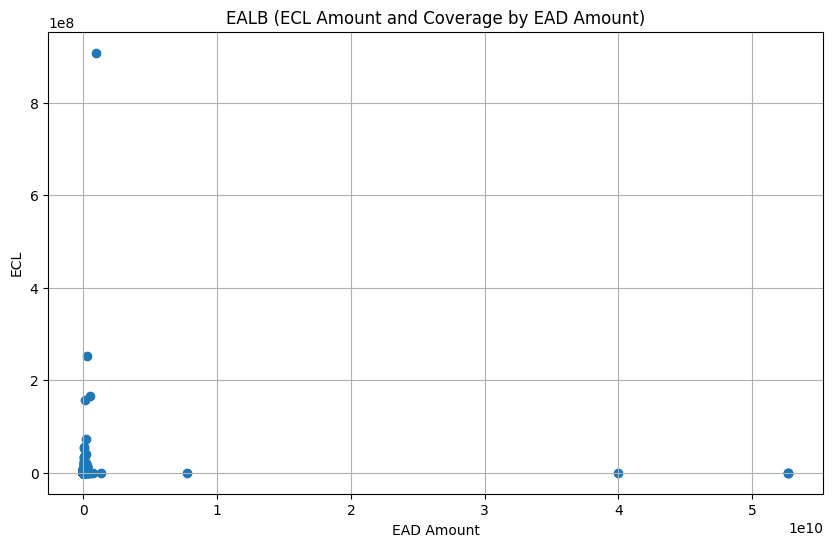

In [30]:
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.scatter(df["Current Exposure"], df["ECL final after all edit"])
plt.title("EALB (ECL Amount and Coverage by EAD Amount)")
plt.xlabel("EAD Amount")
plt.ylabel("ECL")
plt.grid(True)  # Add grid lines (optional)
#plt.savefig("matplotlib_plot.png")  # Save as a PNG image
plt.show() #show the plot in the notebook.

# EALB (ECL Provision vs. EAD Amount) by ACC ID

In [31]:
import plotly.graph_objects as go
import nbformat

fig = go.Figure(data=[go.Scatter(
    x=df["Current Exposure"],
    y=df["ECL final after all edit"],
    mode='markers',
    hoverinfo='text',
    hovertext=[f'EAD Amount: {ead:,.2f}, ECL: {imp:,.2f}, ACC ID: {acc_id}' for ead, imp, acc_id in zip(df["Current Exposure"], 
    df["ECL final after all edit"], df["Position Id"])]
    )])

fig.update_layout(title='EALB (ECL Provision vs. EAD Amount) by ACC ID',
                  xaxis_title='EAD Amount',
                  yaxis_title='ECL')
fig.write_html("EALB (ECL Provision vs. EAD Amount) by ACC ID.html")

fig.show() 

In [32]:
df1=df[df['Stage'] == "STAGE_1"]

fig = go.Figure(data=[go.Scatter(
    x=df1["Current Exposure"],
    y=df1["ECL final after all edit"],
    mode='markers',
    hoverinfo='text',
    hovertext=[f'EAD Amount: {ead:,.2f}, ECL: {imp:,.2f}, ACC ID: {acc_id}' for ead, imp, acc_id in zip(df1["Current Exposure"], 
    df1["ECL final after all edit"], df1["Position Id"])]
    )])

fig.update_layout(title='EALB (ECL Provision vs. EAD Amount) by ACC ID "stage 1"',
                  xaxis_title='EAD Amount',
                  yaxis_title='ECL')
fig.write_html("EALB (ECL Provision vs. EAD Amount) by ACC ID S1.html")

fig.show() 

In [33]:
stages = sorted(df['Stage'].unique())  # Get unique stage values
print(stages)

asw0 = np.sum(df["ECL final after all edit"])
as0 =np.sum(df["Current Exposure"])
print(asw0, as0)

df1=df[df['Stage'] == "STAGE_1"]
asw1 = np.sum(df1["ECL final after all edit"])
as1 =np.sum(df1["Current Exposure"])
print(asw1, as1)

df2=df[df['Stage'] == "STAGE_2"]
asw2 = np.sum(df2["ECL final after all edit"])
as2 =np.sum(df2["Current Exposure"])
print(asw2, as2)

df3=df[df['Stage'] == "STAGE_3"]
asw3 = np.sum(df3["ECL final after all edit"])
as3 =np.sum(df3["Current Exposure"])
print(asw3, as3)

['STAGE_1', 'STAGE_2', 'STAGE_3']
3606870913.051385 235374629682.21893
504936902.2195827 229466037175.4959
1467011617.7425246 3656670662.054724
1634922393.0892768 2251921844.668285


In [34]:
df1=df[df['Stage'] == "STAGE_2"]
df1
fig = go.Figure(data=[go.Scatter(
    x=df1["Current Exposure"],
    y=df1["ECL final after all edit"],
    mode='markers',
    hoverinfo='text',
    hovertext=[f'EAD Amount: {ead:,.2f}, ECL: {imp:,.2f}, ACC ID: {acc_id}' for ead, imp, acc_id in zip(df1["Current Exposure"], 
    df1["ECL final after all edit"], df1["Position Id"])]
    )])

fig.update_layout(title='EALB (ECL Provision vs. EAD Amount) by ACC ID "stage 2"',
                  xaxis_title='EAD Amount',
                  yaxis_title='ECL')
fig.write_html("EALB (ECL Provision vs. EAD Amount) by ACC ID S2.html")
asw2 = np.sum(df1["ECL final after all edit"])
as3 =np.sum(df1["Current Exposure"])
print(asw2, as3)
fig.show() 

1467011617.7425246 3656670662.054724


In [35]:
df1=df[df['Stage'] == "STAGE_3"]
df1
fig = go.Figure(data=[go.Scatter(
    x=df1["Current Exposure"],
    y=df1["ECL final after all edit"],
    mode='markers',
    hoverinfo='text',
    hovertext=[f'EAD Amount: {ead:,.2f}, ECL: {imp:,.2f}, ACC ID: {acc_id}' for ead, imp, acc_id in zip(df1["Current Exposure"], 
    df1["ECL final after all edit"], df1["Position Id"])]
    )])

fig.update_layout(title='EALB (ECL Provision vs. EAD Amount) by ACC ID "stage 3"',
                  xaxis_title='EAD Amount',
                  yaxis_title='ECL')
fig.write_html("EALB (ECL Provision vs. EAD Amount) by ACC ID S3.html")
asw2 = np.sum(df1["ECL final after all edit"])
as3 =np.sum(df1["Current Exposure"])
print(asw2, as3)
fig.show() 

1634922393.0892768 2251921844.668285


In [45]:
stages = sorted(df['Stage'].unique())
print(stages)

# Create a trace for each stage
traces = []
for stage in stages:
    stage_df = df[df['Stage'] == stage]
    trace = go.Scatter(
        x=stage_df["Current Exposure"],
        y=stage_df["ECL final after all edit"],
        mode='markers',
        hoverinfo='text',
        hovertext=[f'EAD Amount: {ead:,.2f}, ECL: {imp:,.2f}, ACC ID: {acc_id}' 
                   for ead, imp, acc_id in zip(stage_df["Current Exposure"], 
                                               stage_df["ECL final after all edit"], 
                                               stage_df["Position Id"])],
        name=stage,  # Set the trace name to the stage
        visible=True  # Initially show all traces
    )
    traces.append(trace)

figv = go.Figure(data=traces)

# Create the dropdown menu
buttons = [dict(label="All", method="update", args=[{"visible": [True] * len(stages)}])]  # Show all traces

for i, stage in enumerate(stages):
    visibility = [False] * len(stages)
    visibility[i] = True
    buttons.append(dict(label=stage, method="update", args=[{"visible": visibility}]))

figv.update_layout(
    updatemenus=[
        dict(
            buttons=buttons,
            direction="down",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.1,
            xanchor="left",
            y=1.1,
            yanchor="top"
        ),
    ]
)
figv.write_html("EALB (ECL Provision vs. EAD Amount) by ACC ID SA.html")
figv.show()

['STAGE_1', 'STAGE_2', 'STAGE_3']


### Adding Dropdown menu

In [43]:
# Create the dropdown menu for the 'Stage' column
stages = sorted(df['Stage'].unique())  # Get unique stage values
buttons = [dict(label="All", method="update", args=[{"visible": [True]* len(df)}])]  # Add "All" option
print(stages)
for stage in stages:
    buttons.append(dict(label=stage, method="update", args=[{"visible": (df['Stage'] == stage).tolist() }]))

figv = go.Figure(data=[go.Scatter(
    x=df["Current Exposure"],
    y=df["ECL final after all edit"],
    mode='markers',
    hoverinfo='text',
    hovertext=[f'EAD Amount: {ead:,.2f}, ECL: {imp:,.2f}, ACC ID: {acc_id}' for ead, imp, acc_id in zip(df["Current Exposure"], 
    df["ECL final after all edit"], df["Position Id"])]
    )])

figv.update_layout(
    updatemenus=[
        dict(
            buttons=buttons,
            direction="down",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.1,
            xanchor="left",
            y=1.1,
            yanchor="top"
        ),
    ]
)

figv.show()

['STAGE_1', 'STAGE_2', 'STAGE_3']


# Pivot table by customer ID